# Spring Framework

## Framework

> SW 특정 문제를 해결하기 위해 상호 협력하는 클래스와 인터페이스 집합

프레임워크를 공부하는 것 = 프레임워크를 사용하는 방법을 익히는 것.  
- 프레임워크가 어떻게 구현되었는지를 공부하는 것이 아니다.

## Spring Framework의 특징

- POJO(Plain Old Java Object) 방식의 프레임워크
  - `servlet`에서 했던 `extends HttpServlet ...` 이런 짓을 안해도 된다.
- 의존성 주입(Dependency Injection)을 통한 객체관계 구성
- 관점지향 프로그래밍(AOP, Aspect Oriented Programming)
- 제어 역전(IoC, Inversion of Control)
- 높은 확장성과 라이브러리

## 의존관계역전

- `package Explorer`
  - `Windows` - `Show View` - `Other...` - `Java` - `Package Explorer`

- `Java Project` 생성
- `Java Class` 생성

### 객체 생성 의존성

프로그래머와 컴퓨터의 관계로 예를 들어 보자.

```java
public class Desktop {
  
    public String getInfo() {
        return "desktop";
    }
  
}
```

```java
package com.ssafy.di1;

public class Programmer {
    private Desktop desktop;
  
    public Programmer() {
        // 프로그래머에게 아묻따 컴퓨터 제공
        this.desktop = new Desktop();
    }
  
    public void coding() {
        System.out.println(desktop.getInfo() + "으로 개발하는 중.");
    }
}

```

```java
package com.ssafy.di1;

public class Test {
    public static void main(String[] args) {
        // 프로그래머가 데스크톱에 대한 의존성을 가지고 있다.
        Programmer p = new Programmer();
        p.coding();
    }
  
}
```



- class A 객체가 어떤 일을 처리하기 위해 class B 객체의 도움을 받아야만 한다면,
- class A는 class B에 `의존한다` 라고 표현
- 프로그래머는 컴퓨터에 의존한다.

```java
public Programmer() {
    // 프로그래머에게 아묻따 컴퓨터 제공
    this.desktop = new Desktop();
  }
```
- 위의 예에서 이건 `객체 생성 의존성`이라고 한다.

### 객체 생성 의존성 제거

프로그래머가 생성될 때 컴퓨터를 생성하지 않고, 만들어진 컴퓨터를 준다.  
```java
public Programmer(Desktop desktop) {
        // 가지고있는 데스크탑 하나 줘.
        // 객체 생성 의존성 제거.
        this.desktop = desktop;
    }
```

```java
public class Test {
    public static void main(String[] args) {
        // 프로그래머가 데스크톱에 대한 의존성을 가지고 있다.
//		Programmer p = new Programmer();
        Desktop desktop = new Desktop();
        Programmer p = new Programmer(desktop);
        p.coding();
        
    }
    
}
```

### 타입 의존성 제거 

무조건 데스크탑이 아니라 프로그래머마다 랩탑 또는 데스크탑을 제공한다면?
- `Computer` `인터페이스`를 만든다.

```java
public interface Computer {
    String getInfo();
}
```
```java
public class Desktop implements Computer {
    public String getInfo() {
        return "desktop";
    }
}
```
```java
public class Laptop implements Computer {
    public String getInfo() {
        return "Laptop";
    }

}
```
```java
public class Programmer {
    private Computer computer;

    public Programmer(Computer computer) {
        this.computer = computer;
    }
  
    public void coding() {
        System.out.println(computer.getInfo() + "으로 개발하는 중.");
    }
}
```
```java
public class Test {
    public static void main(String[] args) {
        Desktop desktop = new Desktop();
        Laptop laptop = new Laptop();
        Programmer p1 = new Programmer(desktop);
        Programmer p2 = new Programmer(laptop);
        p1.coding();
        p2.coding();
    }
  
}
```
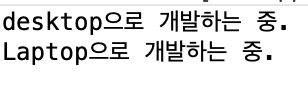

## 의존성 주입

### 설정자를 이용한 주입

```java
public class Programmer {
    ...
    public void setComputer(Computer computer) {
    this.computer = computer;
    
  }
}
```

### 메서드를 이용한 주입

```java
public class Programmer {
    private Computer computer;
    private Keyboard keyboard;

        public void init(Computer computer, Keyboard keyboard) {
        this.computer = computer;
        this.keyboard = keyboard;
            
    }
}
```

컴퓨터 공장을 만들어보자.

```java
public class ComputerFactory {
    public static Computer getComputer(String type) {
        if (type.equals("D")) return new Desktop();
        else if (type.equals("L")) return new Laptop();
        else return null;
    }
}
```
```java
public class Test {
    public static void main(String[] args) {
        Programmer p3 = new Programmer();
        Scanner sc = new Scanner(System.in);
        while (true) {
        Computer computer = ComputerFactory.getComputer(sc.next());
        p3.setComputer(computer);
        p3.coding();
        }
    }
}
```
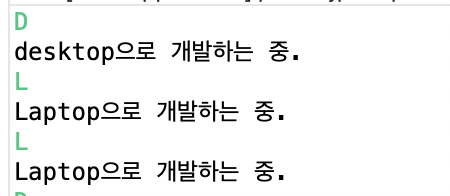



## Spring Contianer Build

### Container

> 스프링에서 핵심적인 역할을 하는 객체를 `Bean`이라고 하며, Container는 Bean의 인스턴스화 조립, 관리의 역할, 사용 소멸에 대한 처리를 담당한다.

- `BeanFactory`
  - 프레임워크 설정과 기본 기능을 제공하는 컨테이너
  - 모든 유형의 객체를 관리할 수 있는 메커니즘 제공
- `ApplicationContext`
  - `BeanFactory` 하위 인터페이스
  - 이벤트 처리, 국제화용 메시지 처리 등 다양한 기능 제공
- `WebApplicationContext`
  - 웹 환경에서 Spring을 사용하기 위한 기능이 추가됨
  - 대표적인 구현 클래스로 `XmlWebApplicationContext`

### Spring Container 빌드

> `pom.xml`에 `Spring Context` 의존성을 추가

- `Java Project` 우클릭 - `Configure` - `Convert to Maven Project`
- 처음부터 `Maven Project`로 만들면 일일이 작성해야 돼서 귀찮다.
- [MavenRepository](https://mvnrepository.com/artifact/org.springframework/spring-context/6.2.0)에서 `Spring` - `Spring Context`에서 최신버전 선택

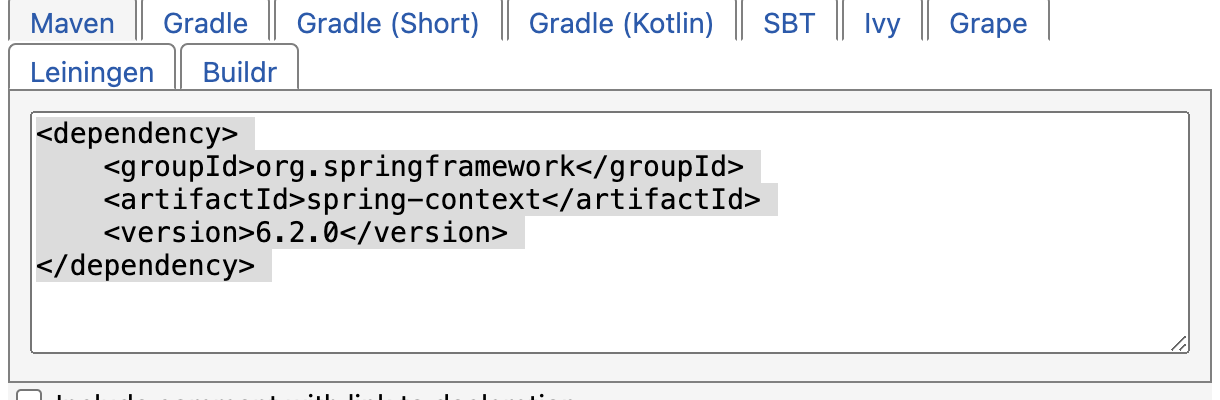

- `Maven Project` - `pom.xml`에서 `<dependencies>` 태그를 적고 그 안에 복붙
  ```xml
  ...
    </build>
    <dependencies>
      <dependency>
        <groupId>org.springframework</groupId>
        <artifactId>spring-context</artifactId>
        <version>6.2.0</version>
      </dependency>
    </dependencies>
  </project>
  ```

- `resources` `Source Folder` 생성  
  - <span style="color:crimson">그냥 폴더로 생성하면 안되고 반드시 Source 폴더로 생성해야 한다.</span>

  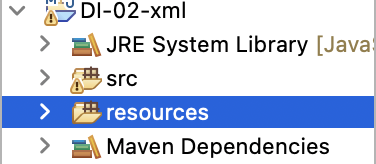

- `resources` 폴더에 `New` - `Other` - `XML`
  - 파일명은 관례적으로 `applicationContext.xml`  
  - [spring.io](https://docs.spring.io/spring-framework/reference/core/appendix/xsd-schemas.html#xsd-schemas-util-set) - `Spring FrameWork` - `Reference Docs` - `XML` - `context Schema`의 내용을 복붙한다.
  


- 빨간줄이 뜰 수 있는데 무시해도 상관 없고 `Preference` - `Maven` - `Download Artifact Javadoc` 체크를 토글하면 사라진다.  

  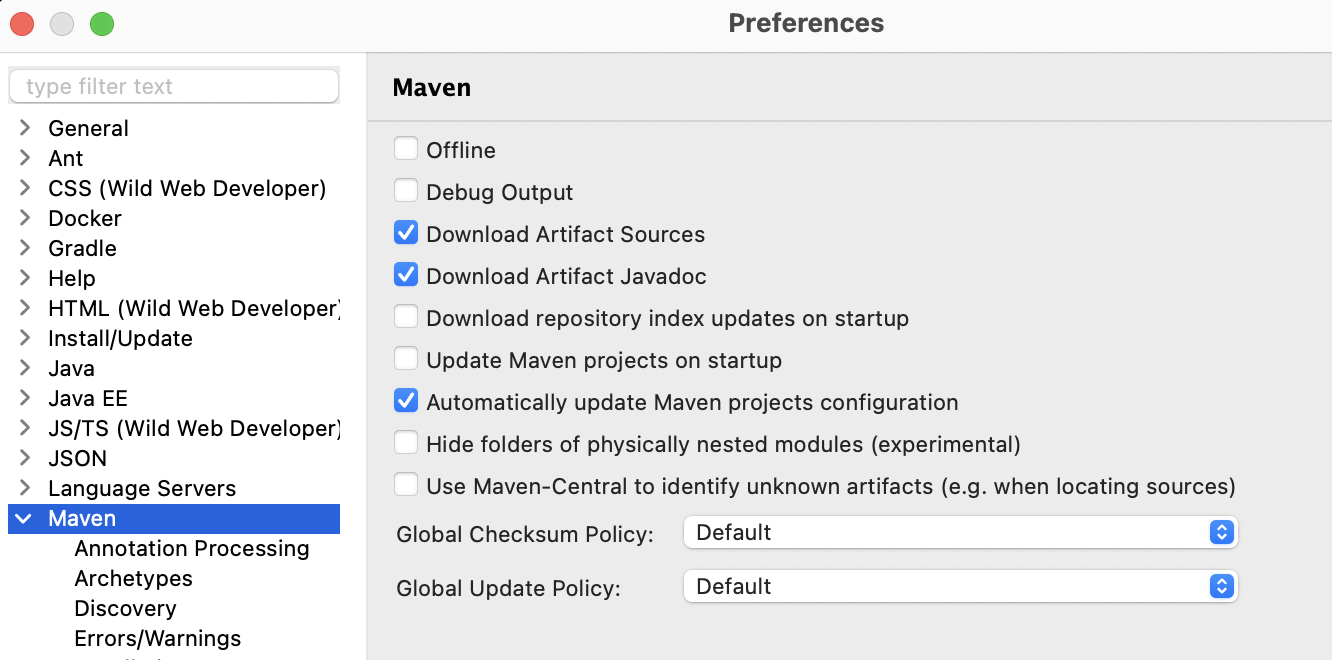


- `bean` 등록
  ```xml
  <!-- bean definitions here -->
  <bean class="com.ssafy.di.Desktop" id="desktop"></bean>
  <bean class="com.ssafy.di.Programmer" id="programmer"></bean>
  ```
  - 풀패키지명을 작성해야 한다.

- `Spring Container`를 이용하여 객체 가져오기
  ```java
  package com.ssafy.di;

  import org.springframework.context.support.GenericXmlApplicationContext;
  import org.springframework.context.ApplicationContext;

  public class Test {

      public static void main(String[] args) {
          ApplicationContext context = new GenericXmlApplicationContext("applicationContext.xml");
          
          Programmer p = (Programmer) context.getBean("programmer"); // 형변환
          Desktop desktop = context.getBean("desktop", Desktop.class); // 형변환 필요 x
          
          p.setComputer(desktop);
          p.coding();
      }

  }
  ```
  - `bean`에 등록한 클래스의 `id`를 인자로 넣어야 한다.
  - `getBean`은 객체를 가져온다.
  - 이때 객체의 생성은 `GenericXmlApplication` <span style="color:skyblue">컨테이너를 빌드할 때</span> 이루어진다.
    - 생성을 해놓고, 가지고 있다가 `getBean`에서 가지고 있는 객체를 전달한다.
  


#### Bean Scope

```java
Desktop d1 = context.getBean("desktop", Desktop.class);
Desktop d2 = context.getBean("desktop", Desktop.class);

System.out.println(d1 == d2);
```
- 결과는 `true`다.
  - 기본적으로 싱글톤으로 관리하기 때문

##### 싱글톤이 아니라 새로운 인스턴스를 생성하고 싶다면?
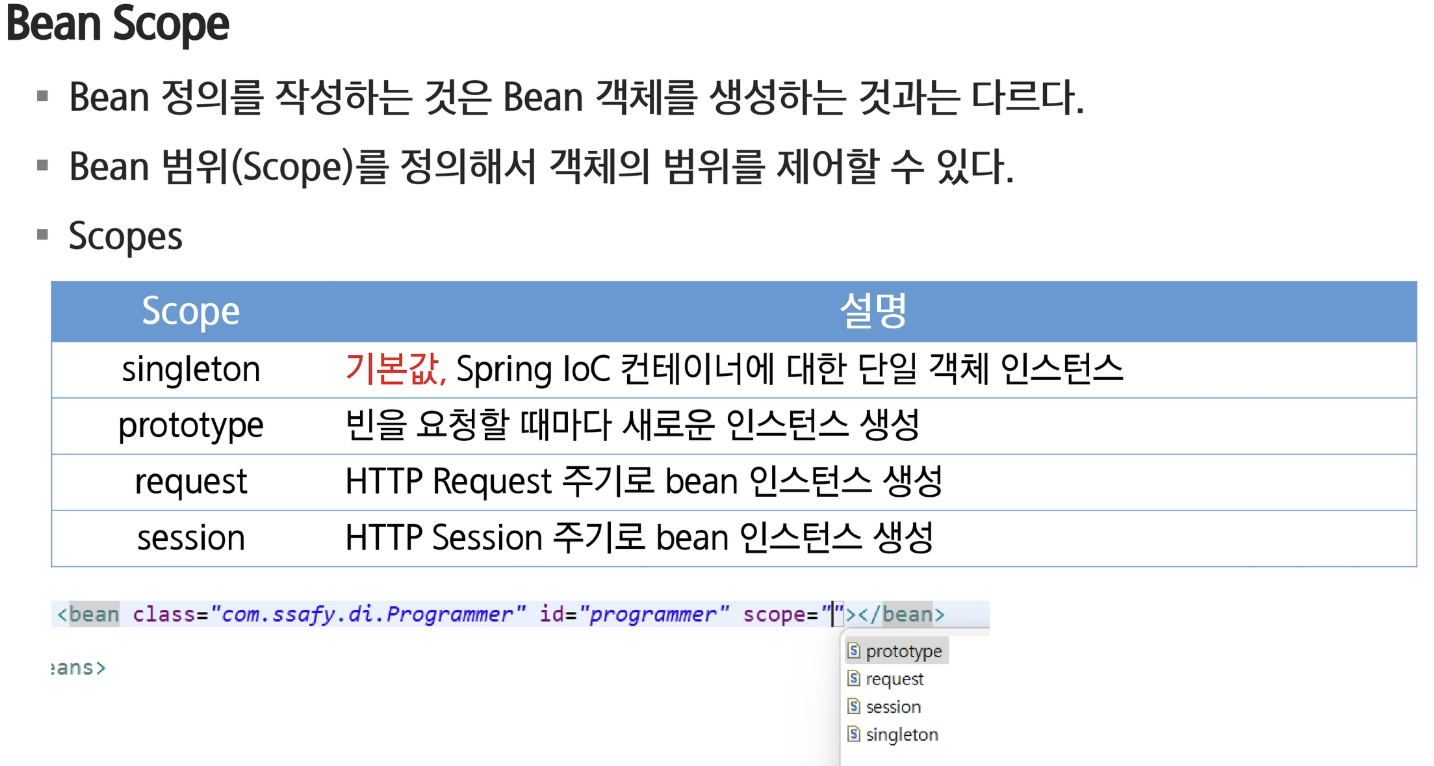

### 의존성 주입 - 생성자

위의 예에서는 `Programmer` 클래스의 `setter`인 `setComputer`를 호출해서 직접 조립했다.
- "해줘"

1. 생성자를 만든다.  
  ```java
      public Programmer(Computer computer) {
          this.computer = computer;
      }
  ```

2. `applicationContext`에서 `constructor-arg`를 이용해 의존성을 주입한다.  
  ```xml
    <bean class="com.ssafy.di.Programmer" id="programmer">
      <constructor-arg ref="desktop"></constructor-arg>
    </bean>
  ```

3. 이제 `setComputer`를 하지 않아도 `Computer`를 조립해서 갖다준다.  
```java
    public static void main(String[] args) {
        ApplicationContext context = new GenericXmlApplicationContext("applicationContext2.xml");
        
        Programmer p = (Programmer) context.getBean("programmer");
        
        p.coding();
      }
```

### 의존성 주입 - 설정자

```xml
<bean class="com.ssafy.di.Programmer" id="programmer">
  <property name="computer" ref="laptop"></property>
</bean>
```

```java
  public Programmer() {
    
  }
  public void setComputer(Computer computer) {
      this.computer = computer;
  }
```
- <span style="color:crimson">기본생성자 `Programmer()`가 없으면 안 된다.</span>
- <span style="color:crimson">`setter`이름이 `set`+`property명`이 아니면 안 된다.</span>

### 의존성 주입 - Annotation

#### `@Component`

생성할 객체의 클래스에 `@Component` 어노테이션으로 등록  

```java
@Component
public class Desktop implements Computer {
    public String getInfo() {
        return "Desktop";
    }
}
```


혹은 `value`를 지정할 수 있음
```java
@Component(value="p")
```

- 이러면 나중에 아래와 같이 생성
  ```java
  Programmer p = context.getBean("p", Programmer.class);
  ```

`applicationContext`에서 의존성 설정을 위해 대상 패키지를 지정  
- `context:component-scan`
  ```xml
  <?xml version="1.0" encoding="UTF-8"?>
    <beans xmlns="http://www.springframework.org/schema/beans"
        xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
        xmlns:context="http://www.springframework.org/schema/context"
        xsi:schemaLocation="
            http://www.springframework.org/schema/beans https://www.springframework.org/schema/beans/spring-beans.xsd
            http://www.springframework.org/schema/context https://www.springframework.org/schema/context/spring-context.xsd">

        <context:component-scan base-package="com.ssafy.di"></context:component-scan>
    </beans>
```

#### `@Autowired`

`@Autowired` 어노테이션으로 의존성 주입  
```java
@Autowired
public Programmer(Computer computer) {
    this.computer = computer;
}
```
- 생성자 외에도 `setter`(`setComputer` 등), `field`에서 사용 가능
  - `@Qualifier("desktop")` 어노테이션을 추가해 같은 타입이 여러개일 때 식별 가능
    ```java
    @Autowired
    public void setComputer(@Qualifier("desktop")Computer computer) {
        this.computer = computer;
    }
    ```

### 의존성 주입 - Java Config

#### `@Configuration` & `@Bean`

`Java Config` 방식에서는 더이상 `XML`파일이 필요 없다.
- src에 `ApplicationConfig` 클래스 생성
  ```java
    package com.ssafy.di;

    import org.springframework.context.annotation.Bean;
    import org.springframework.context.annotation.Configuration;

    @Configuration
    public class ApplicationConfig {
        @Bean
        public Desktop desktop() {
            return new Desktop();
        }
        
        @Bean
        public Programmer programmer() {
            // 생성자 주입
            Programmer p = new Programmer(desktop());
            return p;
        }
    }
    ```
    - 이때 `new`지만 싱글톤으로 관리하기 때문에 객체가 계속 생성되지 않는다.
      - `@Scope`로 조정 가능

- `ApplicationContext`가 아니라 `AnnotationConfigApplicationContext` 사용
  ```java
    public static void main(String[] args) {
		AnnotationConfigApplicationContext context = new AnnotationConfigApplicationContext(ApplicationConfig.class);
		
		Programmer p = context.getBean("programmer", Programmer.class);
		p.coding();
	}
  ```

#### `@Configuration` & `@ComponentScan`

클래스 하나하나 등록하지 않고 `Scan`하는 방식  
```java
@Configuration
@ComponentScan(basePackages = {"com.ssafy.di"})
public class ApplicationConfig {
	
}
```
